In [25]:
#Muhammad Rafi Andrianto
#26002104791

import pandas as pd

# Read in the CSV file and store it in a DataFrame called 'df'
df = pd.read_csv('dataset_elec_4000.csv')

# Display the first few rows of the DataFrame
df.head()

,review,rating
0,This case is just beautiful. I can't think of ...,1.0
1,My husband purchased these because he likes mo...,1.0
2,Very disappointed. This item worked a time or...,0.0
3,"...first of all, this Lightning cable does exa...",1.0
4,"Very bad, slow, flakey software. Very slow. I ...",0.0


In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set color palette for plots
color = sns.color_palette()

# Enable inline plotting
%matplotlib inline

# Import Plotly modules for interactive plots
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.express as px

# Create a histogram of the 'rating' column in the DataFrame 'df' using Plotly express
fig = px.histogram(df, x="rating")

# Update the traces and layout of the plot 
fig.update_traces(marker_color="indianred",marker_line_color='rgb(8,48,107)', marker_line_width=1.5)
fig.update_layout(bargap=0.2)
fig.update_layout(title_text='Product Score')

# Display the plot
fig.show()

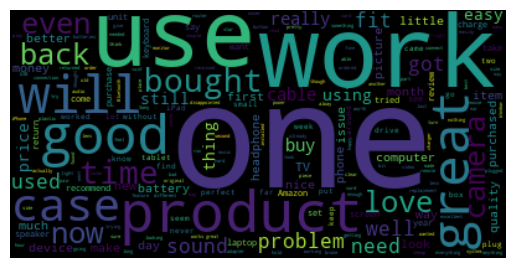

In [27]:
import nltk
from nltk.corpus import stopwords
import wordcloud
from wordcloud import WordCloud, STOPWORDS

# Create a set of stopwords
stopwords = set(STOPWORDS)

# Add the strings "br" and "href" to the set of stopwords
stopwords.update(["br", "href"])

# Concatenate all of the reviews in the df dataframe into a single string called textt
textt = " ".join(review for review in df.review)

# Create a word cloud object
wordcloud = WordCloud(stopwords=stopwords).generate(textt)

# Display the word cloud using matplotlib
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

# Save the word cloud to an image file
plt.savefig('wordcloud11.png')

# Display the word cloud
plt.show()

In [28]:
# Splitting df into positive and negative based on the values in 'rating' 
positive = df[df['rating'] == 1.0]
negative = df[df['rating'] == 0.0]

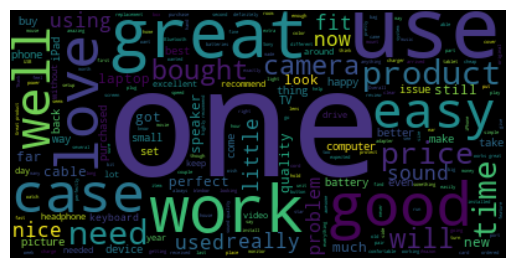

In [29]:
# Join all of the reviews in the positive dataframe into a single string called pos
pos = " ".join(review for review in positive.review)

# Create a word cloud object
wordcloud2 = WordCloud(stopwords=stopwords).generate(pos)

# Display the word cloud using matplotlib
plt.imshow(wordcloud2, interpolation='bilinear')
plt.axis("off")

# Display the word cloud
plt.show()

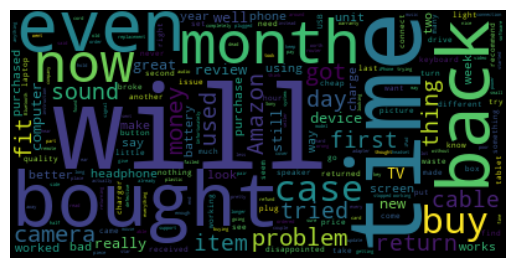

In [30]:
# Create a set of stopwords and add additional words to the set
stopwords = set(STOPWORDS)
stopwords.update(["br", "href", "one", "work", "use", "product", "good"]) 

# Join all of the reviews in the negative dataframe into a single string called neg
neg = " ".join(review for review in negative.review)

# Create a word cloud object
wordcloud3 = WordCloud(stopwords=stopwords).generate(neg)
plt.imshow(wordcloud3, interpolation='bilinear')
plt.axis("off")

# Save the word cloud to an image file
plt.savefig('wordcloud33.png')

# Display the word cloud
plt.show()

In [31]:
# Removing punctuations
def remove_punctuation(review):
    final = "".join(u for u in review if u not in ("?", ".", ";", ":", "!",'"'))
    return final

# Apply the remove_punctuation() function to every element in the 'review' column of df
df['review'] = df['review'].apply(remove_punctuation)

In [32]:
import numpy as np
index = df.index

# Randomly split the train and test data
df['random_number'] = np.random.randn(len(index))

# Create a dataframe called 'train' containing approximately 80% of the data
train = df[df['random_number'] <= 0.8]

# Create a dataframe called 'test' containing the remaining approximately 20% of the data
test = df[df['random_number'] > 0.8]

In [33]:
from sklearn.feature_extraction.text import CountVectorizer

# Create a CountVectorizer object
vectorizer = CountVectorizer(token_pattern=r'\b\w+\b')

# Use the fit_transform method of vectorizer to fit it to the 'review' column of train and transform it into a matrix of token counts
train_matrix = vectorizer.fit_transform(train['review'])

# Use the transform method of vectorizer to transform the 'review' column of test into a matrix of token counts
test_matrix = vectorizer.transform(test['review'])

In [34]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

# Create a LogisticRegression object using the lbfgs solver and a maximum of 1000 iterations

lr = LogisticRegression(solver='lbfgs', max_iter=1000)

# Split the target and independent variables from the train and test data
X_train = train_matrix
X_test = test_matrix
y_train = train['rating']
y_test = test['rating']

# Fit the model to the training data
lr.fit(X_train,y_train)

# Use the model to make predictions on the test data
predictions = lr.predict(X_test)
print(test['rating'])

2       0.0
6       1.0
9       1.0
13      1.0
21      1.0
       ... 
3975    1.0
3978    1.0
3989    1.0
3991    0.0
3999    0.0
Name: rating, Length: 822, dtype: float64


In [35]:
from sklearn.metrics import confusion_matrix,classification_report

# Convert the y_test variable from a Pandas series to a NumPy array
new = np.asarray(y_test)

# Calculate the confusion matrix for the predicted and true labels
confusion_matrix(predictions,y_test)

array([[348,  70],
       [ 54, 350]])

In [36]:
# Generate a classification report for the predicted and true labels
print('Logistic Regression')
print('-'*55)
print(classification_report(predictions,y_test))

Logistic Regression
-------------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.87      0.83      0.85       418
         1.0       0.83      0.87      0.85       404

    accuracy                           0.85       822
   macro avg       0.85      0.85      0.85       822
weighted avg       0.85      0.85      0.85       822

